# Capstone Project — The Battle of Neighbourhoods

## Introduction

New Delhi is the capital city of India. It is a part of the city of Delhi’s 11 districts. The city itself has a population of 257,803. However, the much larger metro area has a population that exceeds 26 million.

New Delhi are used interchangeably to refer to the National Capital Territory of Delhi (NCT), these are two distinct entities, with New Delhi forming a small part of Delhi. The National Capital Region is a much larger entity comprising the entire NCT along with adjoining districts in neighboring states.

The official language of New Delhi and the one that is most widely spoken is Hindi. However, English is also spoken as a formal language within businesses and government agencies. Over last decades it is continuously grow because of the city’s important role in government and commercial business.

With it’s diverse culture , comes diverse food items. There are many restaurants in New Delhi City, each belonging to different categories like Chinese , Italian , French etc. So as part of this project , we will list and visualise all major parts of New Delhi City .|

## Questions that can be asked using the above mentioned datasets

- What is best location in New Delhi City for Chinese Cuisine ?
- Which areas have large number of Chinese Resturant Market ?
- Which all areas have less number of resturant ?
- Which is the best place to stay if I prefer Chinese Cuisine ?
- What places are have best restaurant in New Delhi?

## Data

For this project we need the following data :

- New Delhi Resturants data that contains list Locality, Resturant name,Rating along with their latitude and longitude.
    - Data source : [Zomato kaggel dataset](https://www.kaggle.com/shrutimehta/zomato-restaurants-data)
    - Description : This data set contains the required information. And we will use this data set to explore various locality of new delhi city.
- Nearby places in each locality of new delhi city.
    - Data source : [Fousquare API](https://developer.foursquare.com/)
    - Description : By using this api we will get all the venues in each neighborhood.

## Approach

- Collect the new delhi city data from [Zomato kaggel dataset](https://www.kaggle.com/shrutimehta/zomato-restaurants-data)
- Using FourSquare API we will find all venues for each neighborhood.
- Filter out all venues that are nearby by locality.
- Using aggregative rating for each resturant to find the best places.
- Visualize the Ranking of neighborhoods using folium library(python)

In [4]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip3 install folium
import folium # map rendering library
!pip3 install geocoder
import geocoder

     |████████████████████████████████| 94 kB 5.0 MB/s  eta 0:00:01
     |████████████████████████████████| 98 kB 9.3 MB/s  eta 0:00:01


## Read the zomato resturant data from csv file

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/haanjiankur/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv',encoding='ISO-8859-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [6]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'New Delhi']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  ...            Currency  \
0                       Cuisine Varies  ...  Indian Rupees(Rs.)   
1                            Fast Food  ...  Indian Rupees(Rs.)   
2   North Indian, Seafood, Continental  ...  Indian Rupees(Rs.)   
3           South Indian, North Indian  ...  Indian Rupees(Rs.)   
4  South Indian, North Indian, Chinese  ...  Indian Rupees(Rs.)   

  Has Table booking Has Online delivery Is delivering now  \
0                No                  No                No   
1                No                 Yes                No   
2               Yes                 Yes                No   
3                No                  No                No   
4                No                 Yes                No   

  Switch to order menu Price range  Aggregate rating  Rating color  \
0                   No           2               0.0         White   
1                   No           1               3.2        Orange   
2                   No           3               3.4        Orange   
3                   No           2               2.6        Orange   
4                   No           2               3.4        Orange   

  Rating text Votes  
0   Not rated     2  
1     Average    46  
2     Average    45  
3     Average    11  
4     Average   238  

[5 rows x 21 columns]

## Data Cleaning

remove the unwanted columns and rows from dataset

In [7]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

### created map to show the restaurant cluters

In [8]:
New_Delhi_Rest = folium.Map(location=[28.52, 77.25], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

In [9]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  \
1                            Fast Food               3.2     Average     46   
2   North Indian, Seafood, Continental               3.4     Average     45   
3           South Indian, North Indian               2.6     Average     11   
4  South Indian, North Indian, Chinese               3.4     Average    238   
5                              Mughlai               3.1     Average      8   

   Cluster  
1        1  
2        1  
3        1  
4        1  
5        1

## What places are have best restaurant in New Delhi?

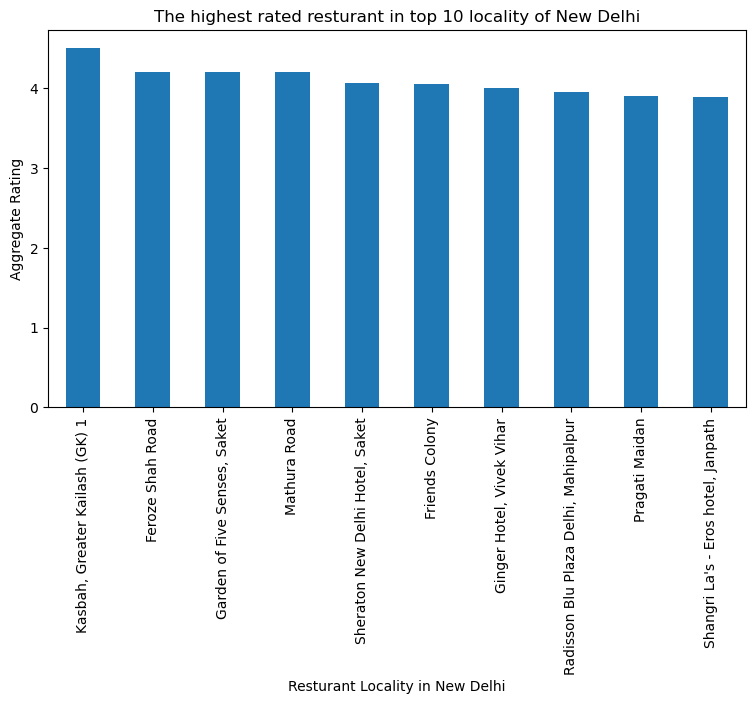

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

The best restarants are available in **Kesbah, Greater Kailash area.**

## what places are have worst restaurants in New Delhi?

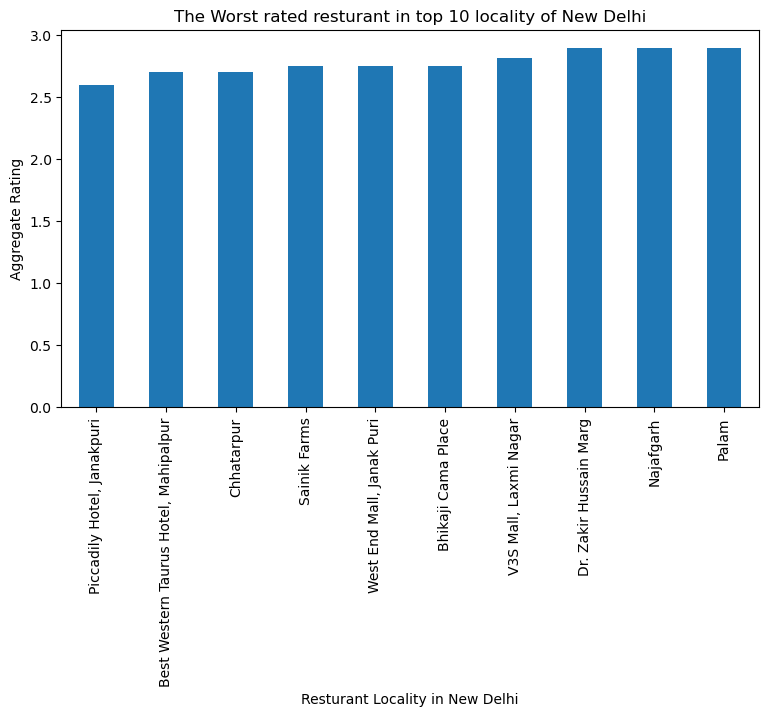

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

The worst restarants are available in **Piccadily Hotel, Janakpuri.**

## Which place are suitable for edible person in New Delhi city?

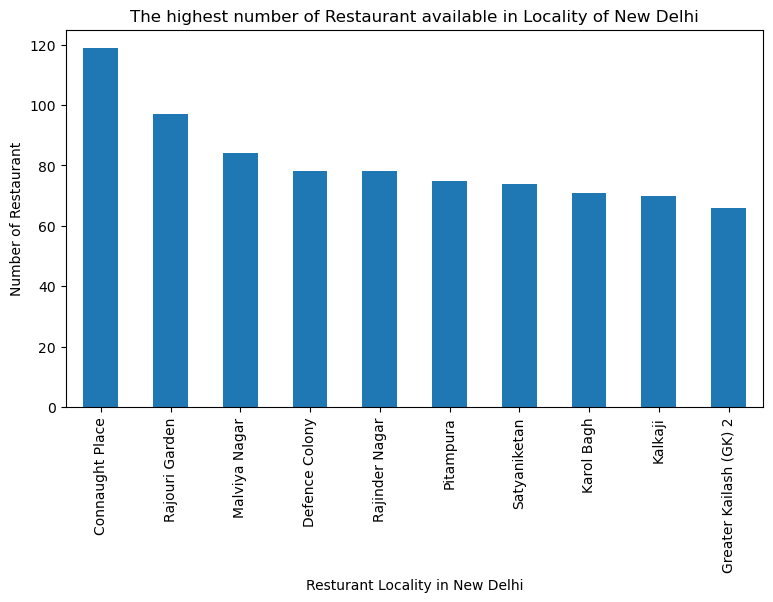

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()


**Connaught Place** is the best places for edible person to stay there.

## Which place are not suitable for edible person in New Delhi city?

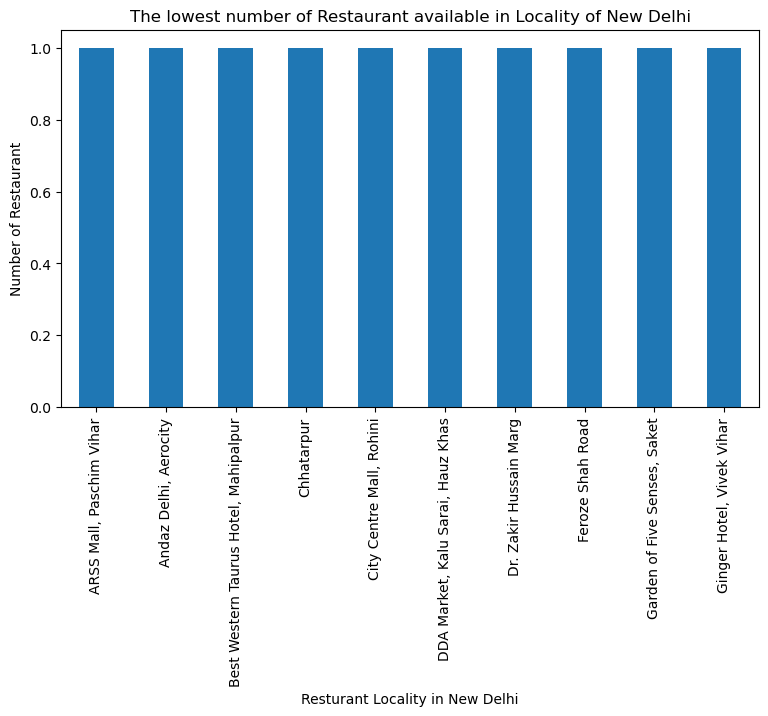

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

## What are the best places for chinese restaurant in New Delhi city

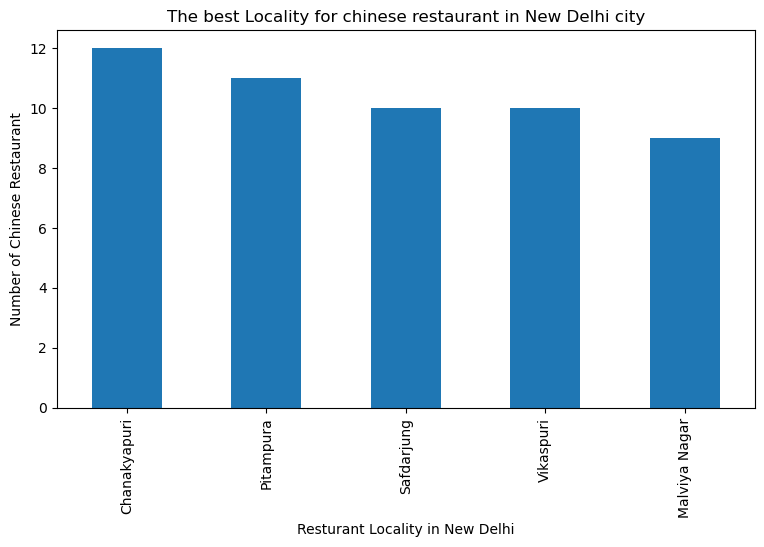

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Chinese Restaurant')

#displays the plot
plt.show()

**Chanakyapuri** is the best place for Chinese restaurant.

## which places are the best chinese resturants in New Delhi?

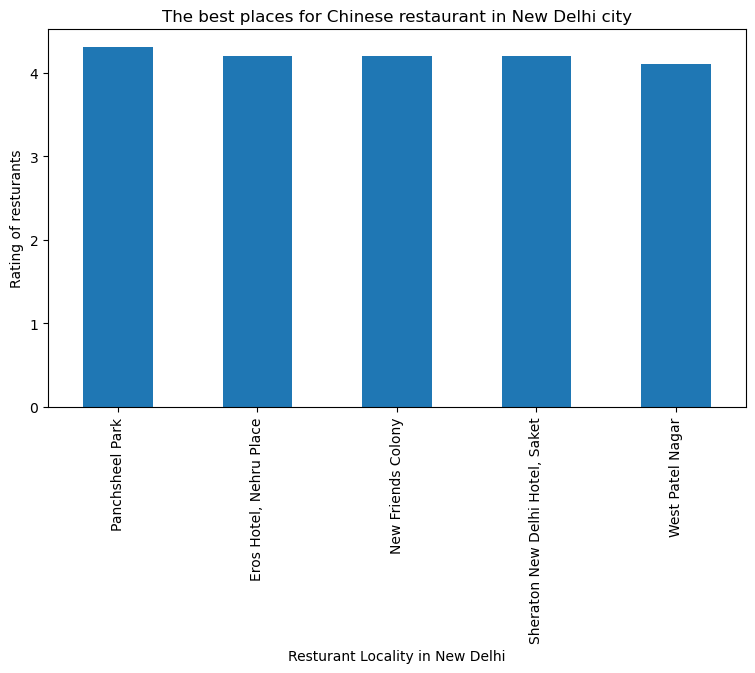

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

**Panchsheel** park is best Chinese resturants.

## Data transformation

Based on Locality grouping the data

In [17]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [18]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [19]:
df_final.shape

(240, 8)

## Define Foursquare Credentials and Version

In [20]:
# Define Foursquare Credentials and Version
CLIENT_ID = 'ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ' # Foursquare ID
CLIENT_SECRET = 'H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ
CLIENT_SECRET:H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW


## create a function to repeat the same process to all the Locality in New Delhi

In [21]:
## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## find the venues in all New Delhi Locality

In [22]:
 #find the venues in all New Delhi Locality
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [23]:
new_Delhi_venues.head()

Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1                    Pizza Hut       28.670321        77.103853   
2              Café Coffee Day       28.670009        77.102480   
3  Baljeet's Amritsari Koolcha       28.665768        77.100481   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0      Sandwich Place  
1         Pizza Place  
2         Coffee Shop  
3   Indian Restaurant  
4  Chinese Restaurant

In [24]:
new_Delhi_venues.groupby('Locality').count()

Locality Latitude  Locality Longitude  Venue  \
Locality                                                                       
ARSS Mall, Paschim Vihar                        9                   9      9   
Adchini                                         7                   7      7   
Aditya Mega Mall, Karkardooma                  10                  10     10   
Aerocity                                        7                   7      7   
Aggarwal City Mall, Pitampura                   5                   5      5   
...                                           ...                 ...    ...   
West Gate Mall, Rajouri Garden                 16                  16     16   
West Patel Nagar                                5                   5      5   
Worldmark 1, Aerocity                          30                  30     30   
Yusuf Sarai                                    11                  11     11   
ibis New Delhi, Aerocity                       28                  28     28   

                                Venue Latitude  Venue Longitude  \
Locality                                                          
ARSS Mall, Paschim Vihar                     9                9   
Adchini                                      7                7   
Aditya Mega Mall, Karkardooma               10               10   
Aerocity                                     7                7   
Aggarwal City Mall, Pitampura                5                5   
...                                        ...              ...   
West Gate Mall, Rajouri Garden              16               16   
West Patel Nagar                             5                5   
Worldmark 1, Aerocity                       30               30   
Yusuf Sarai                                 11               11   
ibis New Delhi, Aerocity                    28               28   

                                Venue Category  
Locality                                        
ARSS Mall, Paschim Vihar                     9  
Adchini                                      7  
Aditya Mega Mall, Karkardooma               10  
Aerocity                                     7  
Aggarwal City Mall, Pitampura                5  
...                                        ...  
West Gate Mall, Rajouri Garden              16  
West Patel Nagar                             5  
Worldmark 1, Aerocity                       30  
Yusuf Sarai                                 11  
ibis New Delhi, Aerocity                    28  

[238 rows x 6 columns]

In [25]:
print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))

There are 213 uniques categories.


In [27]:
## Analyze Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

Locality  ATM  Accessories Store  Afghan Restaurant  \
0  ARSS Mall, Paschim Vihar    0                  0                  0   
1  ARSS Mall, Paschim Vihar    0                  0                  0   
2  ARSS Mall, Paschim Vihar    0                  0                  0   
3  ARSS Mall, Paschim Vihar    0                  0                  0   
4  ARSS Mall, Paschim Vihar    0                  0                  0   

   African Restaurant  Airport  Airport Food Court  Airport Lounge  \
0                   0        0                   0               0   
1                   0        0                   0               0   
2                   0        0                   0               0   
3                   0        0                   0               0   
4                   0        0                   0               0   

   Airport Service  Airport Terminal  ...  Toy / Game Store  Trail  \
0                0                 0  ...                 0      0   
1                0                 0  ...                 0      0   
2                0                 0  ...                 0      0   
3                0                 0  ...                 0      0   
4                0                 0  ...                 0      0   

   Train Station  Turkish Restaurant  Udupi Restaurant  \
0              0                   0                 0   
1              0                   0                 0   
2              0                   0                 0   
3              0                   0                 0   
4              0                   0                 0   

   Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Whisky Bar  \
0                              0                      0           0   
1                              0                      0           0   
2                              0                      0           0   
3                              0                      0           0   
4                              0                      0           0   

   Wings Joint  Women's Store  
0            0              0  
1            0              0  
2            0              0  
3            0              0  
4            0              0  

[5 rows x 214 columns]

In [28]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

Locality       ATM  Accessories Store  \
0          ARSS Mall, Paschim Vihar  0.111111           0.000000   
1                           Adchini  0.000000           0.000000   
2     Aditya Mega Mall, Karkardooma  0.000000           0.000000   
3                          Aerocity  0.000000           0.000000   
4     Aggarwal City Mall, Pitampura  0.000000           0.000000   
..                              ...       ...                ...   
233  West Gate Mall, Rajouri Garden  0.000000           0.000000   
234                West Patel Nagar  0.000000           0.000000   
235           Worldmark 1, Aerocity  0.000000           0.033333   
236                     Yusuf Sarai  0.000000           0.000000   
237        ibis New Delhi, Aerocity  0.000000           0.000000   

     Afghan Restaurant  African Restaurant  Airport  Airport Food Court  \
0                  0.0                 0.0      0.0                 0.0   
1                  0.0                 0.0      0.0                 0.0   
2                  0.0                 0.0      0.0                 0.0   
3                  0.0                 0.0      0.0                 0.0   
4                  0.0                 0.0      0.0                 0.0   
..                 ...                 ...      ...                 ...   
233                0.0                 0.0      0.0                 0.0   
234                0.0                 0.0      0.0                 0.0   
235                0.0                 0.0      0.0                 0.0   
236                0.0                 0.0      0.0                 0.0   
237                0.0                 0.0      0.0                 0.0   

     Airport Lounge  Airport Service  Airport Terminal  ...  Toy / Game Store  \
0          0.000000              0.0          0.000000  ...               0.0   
1          0.000000              0.0          0.000000  ...               0.0   
2          0.000000              0.0          0.000000  ...               0.0   
3          0.142857              0.0          0.142857  ...               0.0   
4          0.000000              0.0          0.000000  ...               0.0   
..              ...              ...               ...  ...               ...   
233        0.000000              0.0          0.000000  ...               0.0   
234        0.000000              0.0          0.000000  ...               0.0   
235        0.000000              0.0          0.000000  ...               0.0   
236        0.000000              0.0          0.000000  ...               0.0   
237        0.000000              0.0          0.000000  ...               0.0   

     Trail  Train Station  Turkish Restaurant  Udupi Restaurant  \
0      0.0       0.000000                 0.0               0.0   
1      0.0       0.000000                 0.0               0.0   
2      0.0       0.000000                 0.0               0.0   
3      0.0       0.000000                 0.0               0.0   
4      0.0       0.000000                 0.0               0.0   
..     ...            ...                 ...               ...   
233    0.0       0.000000                 0.0               0.0   
234    0.0       0.000000                 0.0               0.0   
235    0.0       0.033333                 0.0               0.0   
236    0.0       0.000000                 0.0               0.0   
237    0.0       0.035714                 0.0               0.0   

     Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Whisky Bar  \
0                              0.0                    0.0         0.0   
1                              0.0                    0.0         0.0   
2                              0.0                    0.0         0.0   
3                              0.0                    0.0         0.0   
4                              0.0                    0.0         0.0   
..                             ...                    ...         ...   
233                 

In [29]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

Locality       ATM  Accessories Store  \
0          ARSS Mall, Paschim Vihar  0.111111           0.000000   
1                           Adchini  0.000000           0.000000   
2     Aditya Mega Mall, Karkardooma  0.000000           0.000000   
3                          Aerocity  0.000000           0.000000   
4     Aggarwal City Mall, Pitampura  0.000000           0.000000   
..                              ...       ...                ...   
233  West Gate Mall, Rajouri Garden  0.000000           0.000000   
234                West Patel Nagar  0.000000           0.000000   
235           Worldmark 1, Aerocity  0.000000           0.033333   
236                     Yusuf Sarai  0.000000           0.000000   
237        ibis New Delhi, Aerocity  0.000000           0.000000   

     Afghan Restaurant  African Restaurant  Airport  Airport Food Court  \
0                  0.0                 0.0      0.0                 0.0   
1                  0.0                 0.0      0.0                 0.0   
2                  0.0                 0.0      0.0                 0.0   
3                  0.0                 0.0      0.0                 0.0   
4                  0.0                 0.0      0.0                 0.0   
..                 ...                 ...      ...                 ...   
233                0.0                 0.0      0.0                 0.0   
234                0.0                 0.0      0.0                 0.0   
235                0.0                 0.0      0.0                 0.0   
236                0.0                 0.0      0.0                 0.0   
237                0.0                 0.0      0.0                 0.0   

     Airport Lounge  Airport Service  Airport Terminal  ...  Toy / Game Store  \
0          0.000000              0.0          0.000000  ...               0.0   
1          0.000000              0.0          0.000000  ...               0.0   
2          0.000000              0.0          0.000000  ...               0.0   
3          0.142857              0.0          0.142857  ...               0.0   
4          0.000000              0.0          0.000000  ...               0.0   
..              ...              ...               ...  ...               ...   
233        0.000000              0.0          0.000000  ...               0.0   
234        0.000000              0.0          0.000000  ...               0.0   
235        0.000000              0.0          0.000000  ...               0.0   
236        0.000000              0.0          0.000000  ...               0.0   
237        0.000000              0.0          0.000000  ...               0.0   

     Trail  Train Station  Turkish Restaurant  Udupi Restaurant  \
0      0.0       0.000000                 0.0               0.0   
1      0.0       0.000000                 0.0               0.0   
2      0.0       0.000000                 0.0               0.0   
3      0.0       0.000000                 0.0               0.0   
4      0.0       0.000000                 0.0               0.0   
..     ...            ...                 ...               ...   
233    0.0       0.000000                 0.0               0.0   
234    0.0       0.000000                 0.0               0.0   
235    0.0       0.033333                 0.0               0.0   
236    0.0       0.000000                 0.0               0.0   
237    0.0       0.035714                 0.0               0.0   

     Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Whisky Bar  \
0                              0.0                    0.0         0.0   
1                              0.0                    0.0         0.0   
2                              0.0                    0.0         0.0   
3                              0.0                    0.0         0.0   
4                              0.0                    0.0         0.0   
..                             ...                    ...         ...   
233                 

In [30]:
New_Delhi_grouped.shape

(238, 214)

In [31]:
# print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
                            venue  freq
0               Indian Restaurant  0.22
1                             ATM  0.11
2                  Sandwich Place  0.11
3                          Market  0.11
4  Multicuisine Indian Restaurant  0.11


----Adchini----
               venue  freq
0  Indian Restaurant  0.29
1               Café  0.29
2   Parsi Restaurant  0.14
3        Coffee Shop  0.14
4                Pub  0.14


----Aditya Mega Mall, Karkardooma----
               venue  freq
0      Shopping Mall   0.2
1        Pizza Place   0.2
2  Indian Restaurant   0.2
3          Multiplex   0.2
4               Café   0.1


----Aerocity----
                 venue  freq
0                Hotel  0.29
1     Airport Terminal  0.14
2       Airport Lounge  0.14
3  Rental Car Location  0.14
4          Coffee Shop  0.14


----Aggarwal City Mall, Pitampura----
               venue  freq
0   Department Store   0.2
1        Pizza Place   0.2
2  Indian Restaurant   0.2
3   

In [32]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [33]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality 1st Most Common Venue  \
0          ARSS Mall, Paschim Vihar     Indian Restaurant   
1                           Adchini     Indian Restaurant   
2     Aditya Mega Mall, Karkardooma     Indian Restaurant   
3                          Aerocity                 Hotel   
4     Aggarwal City Mall, Pitampura     Indian Restaurant   
..                              ...                   ...   
233  West Gate Mall, Rajouri Garden                  Café   
234                West Patel Nagar     Indian Restaurant   
235           Worldmark 1, Aerocity                 Hotel   
236                     Yusuf Sarai           Coffee Shop   
237        ibis New Delhi, Aerocity                 Hotel   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                     ATM           Pizza Place           Coffee Shop   
1                    Café           Coffee Shop                   Pub   
2             Pizza Place             Multiplex         Shopping Mall   
3     Rental Car Location           Coffee Shop        Airport Lounge   
4             Pizza Place      Department Store            Donut Shop   
..                    ...                   ...                   ...   
233  Fast Food Restaurant        Cosmetics Shop            Hookah Bar   
234              Pharmacy           Pizza Place                 Hotel   
235     Indian Restaurant            Restaurant           Coffee Shop   
236     Indian Restaurant                  Park   Japanese Restaurant   
237           Coffee Shop     Indian Restaurant            Restaurant   

    5th Most Common Venue 6th Most Common Venue  \
0          Sandwich Place    Chinese Restaurant   
1        Parsi Restaurant             Hotel Bar   
2                   Hotel                  Café   
3        Airport Terminal  Fast Food Restaurant   
4               Multiplex           Event Space   
..                    ...                   ...   
233             Multiplex            Restaurant   
234  Fast Food Restaurant     Electronics Store   
235       Bed & Breakfast                Lounge   
236                 Hotel      Asian Restaurant   
237         Shopping Mall                Bakery   

              7th Most Common Venue 8th Most Common Venue  \
0    Multicuisine Indian Restaurant                Market   
1                        Hotel Pool     Food & Drink Shop   
2                  Department Store    Falafel Restaurant   
3                     Women's Store   Fried Chicken Joint   
4                 French Restaurant            Food Truck   
..                              ...                   ...   
233             American Restaurant                Garden   
234                      Food Truck            Food Court   
235                          Bakery  Gym / Fitness Center   
236                             Bar    Light Rail Station   
237                          Lounge                  Café   

    9th Most Common Venue 10th Most Common Venue  
0             Event Space             Food Court  
1                    Food            Flea Market  
2       French Restaurant             Food Truck  
3       French Restaurant             Food Truck  
4              Food Court      Food & Drink Shop  
..                    ...                    ...  
233           Pizza Place            Snack Place  
234     Food & Drink Shop                   Food  
235         Shopping Mall     Punjabi Restaurant  
236     Korean Restaurant                   Food  
237             Gastropub        Bed & Breakfast  

[238 rows x 11 columns]

In [34]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(238,)

In [37]:
New_Delhi_merged = df_final.head(238)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  Cluster Labels  \
0                         Average          117               2   
1  Average, Good, Poor, Very Good         1560               2   
2                   Average, Good          434               2   
3                         Average           59               0   
4                         Average          126               2   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Indian Restaurant                   ATM           Pizza Place   
1     Indian Restaurant                  Café           Coffee Shop   
2     Indian Restaurant           Pizza Place             Multiplex   
3                 Hotel   Rental Car Location           Coffee Shop   
4     Indian Restaurant           Pizza Place      Department Store   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0           Coffee Shop        Sandwich Place    Chinese Restaurant   
1                   Pub      Parsi Restaurant             Hotel Bar   
2         Shopping Mall                 Hotel                  Café   
3        Airport Lounge      Airport Terminal  Fast Food Restaurant   
4            Donut Shop             Multiplex           Event Space   

            7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0  Multicuisine Indian Restaurant                Market           Event Space   
1                      Hotel Pool     Food & Drink Shop                  Food   
2                Department Store    Falafel Restaurant     French Restaurant   
3                   Women's Store   Fried Chicken Joint     French Restaurant   
4               French Restaurant            Food Truck            Food Court   

  10th Most Common Venue  
0             Food Court  
1            Flea Market  
2             Food Truck  
3             Food Truck  
4      Food & Drink Shop

In [38]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [39]:
## Examine Clusters

## Cluster 1
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
3    28.553077    3.200000                              Average           59   
10   28.554807    3.000000                              Average            4   
19   28.548827    2.700000                              Average            9   
35   28.590297    3.350000                        Average, Good          127   
56   28.570246    4.050000                   Average, Excellent         1949   
60   28.665829    4.000000                            Very Good          756   
69   28.550327    3.300000                              Average           30   
70   28.590654    3.550000                        Average, Good          302   
72   28.705700    3.350000                        Average, Good          278   
74   28.621267    3.416667                        Average, Good          475   
83   28.552895    3.300000                              Average           15   
111  28.618772    3.666667             Average, Good, Very Good          725   
112  28.552036    3.500000                                 Good           26   
119  28.545033    2.960000                        Average, Good          259   
128  28.608252    2.945000                        Average, Good          406   
148  28.642402    3.195652                        Average, Good         2177   
161  28.639872    3.134483                  Average, Good, Poor         1481   
162  28.725814    3.050000                              Average           50   
167  28.599082    2.900000                              Average            9   
168  28.543814    3.950000  Average, Excellent, Good, Very Good         1225   
173  28.714176    3.352083       Average, Good, Poor, Very Good         4514   
188  28.707685    3.168182             Average, Good, Very Good         1668   
196  28.680905    3.320000                        Average, Good          286   
216  28.594859    3.800000                      Good, Very Good          287   
235  28.652978    3.500000                                 Good          178   
237  28.550257    3.220000                        Average, Good           77   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
3                 0                 Hotel   Rental Car Location   
10                0                 Hotel     Indian Restaurant   
19                0                 Hotel             Hotel Bar   
35                0                 Hotel     Indian Restaurant   
56                0                 Hotel      Sculpture Garden   
60                0                 Hotel                  Café   
69                0                 Hotel     Indian Restaurant   
70                0                 Hotel            Restaurant   
72                0                Garden           Coffee Shop   
74                0                 Hotel     Indian Restaurant   
83                0                 Hotel           Coffee Shop   
111               0                 Hotel                   Spa   
112               0                 Hotel           Coffee Shop   
119               0                 Hotel     Indian Restaurant   
128               0                 Hotel         Women's Store   
148               0            Restaurant           Coffee Shop   
161               0                   ATM        Ice Cream Shop   
162               0                 Hotel                  Café   
167               0        Lighting Store             Racetrack   
168               0                 Hotel     Indian Restaurant   
173               0     Indian Restaurant  Fast Food Restaurant   
188               0     Convenience Store  Gym / Fitness Center   
196               0        Breakfast Spot  Fast Food Restaurant   
216               0                 Hotel     Indian Restaurant   
235               0                  Café  Fast Food Restaurant   
237               0                 Hotel     Indian Restaurant   

    3rd Most Common Venue 4th Most Commo

In [40]:
## Examine Clusters

## Cluster 2
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
22   28.654105    3.085714                                    Average   
57   28.699837    3.376471                   Average, Good, Very Good   
98   28.651527    3.490909                   Average, Good, Very Good   
104  28.656263    3.097619                              Average, Good   
182  28.587918    3.541892  Average, Excellent, Good, Poor, Very Good   

     No_of_Votes  Cluster Labels     1st Most Common Venue  \
22            80               1               Pizza Place   
57          2460               1  Bike Rental / Bike Share   
98          3222               1                Food Truck   
104          965               1               Pizza Place   
182        16386               1         Indian Restaurant   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
22          Women's Store    English Restaurant   Fried Chicken Joint   
57            Pizza Place            Food Truck           Event Space   
98            Pizza Place                 Plaza         Train Station   
104         Women's Store    English Restaurant   Fried Chicken Joint   
182                 Plaza                Bistro           Salad Place   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
22      French Restaurant            Food Truck            Food Court   
57     Frozen Yogurt Shop   Fried Chicken Joint     French Restaurant   
98          Women's Store    English Restaurant     French Restaurant   
104     French Restaurant            Food Truck            Food Court   
182                  Café           Snack Place         Deli / Bodega   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
22      Food & Drink Shop                  Food            Flea Market  
57             Food Court     Food & Drink Shop                   Food  
98             Food Court     Food & Drink Shop                   Food  
104     Food & Drink Shop                  Food            Flea Market  
182                 Diner    Dim Sum Restaurant      French Restaurant

In [41]:
## Examine Clusters

## Cluster 3
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 2, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
0    28.668945    3.100000                              Average          117   
1    28.537063    3.292308       Average, Good, Poor, Very Good         1560   
2    28.656131    3.275000                        Average, Good          434   
4    28.690020    3.033333                              Average          126   
12   28.641698    3.050000                              Average           17   
13   28.690182    3.090000                  Average, Good, Poor          971   
14   28.693969    3.378571                        Average, Good         2343   
16   28.630440    3.208333                  Average, Good, Poor         1779   
18   28.696302    3.300000                        Average, Good          415   
23   28.656414    3.358182             Average, Good, Very Good         6668   
25   28.495624    2.700000                              Average           23   
33   28.657388    3.320000                        Average, Good          636   
42   28.576161    2.983333                  Average, Good, Poor          542   
43   28.643320    3.287500       Average, Good, Poor, Very Good         2570   
46   28.573241    3.225000                  Average, Good, Poor         1106   
47   28.681582    3.046875                  Average, Good, Poor         1224   
49   28.602169    2.900000                              Average            7   
55   28.617102    4.200000                            Very Good         3010   
61   28.668181    3.400000                              Average           33   
65   28.556980    3.272414                  Average, Good, Poor         5243   
66   28.699373    3.252174                        Average, Good          973   
67   28.554545    3.251786  Average, Excellent, Good, Very Good         5479   
71   28.641003    3.650000                        Average, Good          367   
76   28.576785    3.200000                        Average, Good          143   
77   28.631728    3.060714       Average, Good, Poor, Very Good         1650   
84   28.630942    3.122000       Average, Good, Poor, Very Good         1738   
85   28.648885    3.561111             Average, Good, Very Good         7411   
92   28.584294    3.100000                              Average           35   
97   28.662972    3.533333                   Average, Very Good          293   
99   28.648795    3.238028       Average, Good, Poor, Very Good         7282   
110  28.635391    3.040385       Average, Good, Poor, Very Good         2442   
113  28.541242    2.984615                              Average          817   
116  28.486576    2.950000                              Average            8   
118  28.646549    3.200000                              Average           20   
120  28.673708    3.133333                              Average          113   
124  28.521760    4.200000                            Very Good          278   
126  28.602860    2.973214                  Average, Good, Poor         1831   
133  28.708185    3.344444             Average, Good, Very Good          568   
140  28.627959    3.004167                              Average          326   
152  28.544464    3.525000                   Average, Very Good          231   
155  28.669160    3.148214                  Average, Good, Poor         2735   
159  28.613748    3.900000                   Average, Excellent         2313   
163  28.552711    3.100000                              Average            7   
164  28.668055    3.393333  Average, Excellent, Good, Very Good         4670   
177  28.511482    2.750000                        Average, Poor          107   
192  28.526856    4.066667                            Very Good          802   
198  28.636712    3.023529                        Average, Poor          185   
203  28.601187    3.633333                        Average, Good         1018   
208  28.562469    2.971429                  Average, Good, Poor          486   
209  28.631

In [42]:
## Examine Clusters

## Cluster 4
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
6    28.527088    3.117391                  Average, Good, Poor         1012   
7    28.541298    3.425000             Average, Good, Very Good         2460   
8    28.555599    3.800000                   Average, Very Good         2411   
9    28.659870    3.281481                        Average, Good         1309   
17   28.557846    3.220000                  Average, Good, Poor         1875   
..         ...         ...                                  ...          ...   
227  28.559704    3.278261             Average, Good, Very Good         1043   
228  28.596073    3.052941                        Average, Good          305   
229  28.692519    3.606452  Average, Excellent, Good, Very Good        12271   
231  28.637492    3.062264                  Average, Good, Poor         1253   
232  28.667344    3.077273                  Average, Good, Poor          939   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
6                 3        Cosmetics Shop           Coffee Shop   
7                 3           Coffee Shop      Asian Restaurant   
8                 3               Stadium                  Café   
9                 3                  Café          Burger Joint   
17                3                  Café    Chinese Restaurant   
..              ...                   ...                   ...   
227               3                  Café            Restaurant   
228               3                  Café  Gym / Fitness Center   
229               3                  Café    Chinese Restaurant   
231               3     Indian Restaurant        Ice Cream Shop   
232               3             Juice Bar     Indian Restaurant   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
6       Food & Drink Shop            Steakhouse                Market   
7    Fast Food Restaurant                  Café         Shopping Mall   
8             Music Venue         Metro Station           Golf Course   
9           Burrito Place         Women's Store    Falafel Restaurant   
17   Fast Food Restaurant            Restaurant           Coffee Shop   
..                    ...                   ...                   ...   
227  Fast Food Restaurant           Coffee Shop    Chinese Restaurant   
228         Women's Store           Event Space   Fried Chicken Joint   
229                Bakery              Tea Room  Fast Food Restaurant   
231           Pizza Place             Multiplex  Fast Food Restaurant   
232      Department Store       Bed & Breakfast             Gift Shop   

         6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
6           Falafel Restaurant   Fried Chicken Joint     French Restaurant   
7           Italian Restaurant        Clothing Store     Indian Restaurant   
8                 Dessert Shop                 Hotel           Coffee Shop   
9          Fried Chicken Joint     French Restaurant            Food Truck   
17                 Pizza Place      Department Store         Movie Theater   
..                         ...                   ...                   ...   
227  Middle Eastern Restaurant              Tea Room             Bookstore   
228          French Restaurant            Food Truck            Food Court   
229         Italian Restaurant             Pet Store           Cheese Shop   
231         English Restaurant            Food Truck            Food Court   
232         Athletics & Sports         Women's Store  Fast Food Restaurant   

         9th Most Common Venue 10th Most Common Venue  
6                   Food Truck             Food Court  
7           Chinese Restaurant         Sandwich Place  
8         Other Great Outdoors   Fast Food Restaurant  
9                   Food Court      Food & Drink Shop  
17   Middle Eastern Restaurant                    Spa  
..                         ...                    ...  
227           Department Store         

In [43]:
## Examine Clusters

## Cluster 5
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 4, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
5    28.700516    3.040000                        Average, Good, Poor   
11   28.562580    3.750000                   Average, Good, Very Good   
15   28.691136    3.390909                   Average, Good, Very Good   
24   28.649658    3.800000        Average, Excellent, Good, Very Good   
27   28.716874    3.400000                                    Average   
28   28.650254    3.166667                              Average, Good   
34   28.720602    3.600000                                       Good   
36   28.692546    3.480000                              Average, Good   
90   28.642755    3.450000                              Average, Good   
94   28.538153    3.117143                        Average, Good, Poor   
101  28.667644    3.300000                                    Average   
106  28.575525    3.126316                              Average, Good   
130  28.724100    3.133333                                    Average   
132  28.706295    3.256000                   Average, Good, Very Good   
142  28.693270    3.519149                   Average, Good, Very Good   
157  28.629505    2.600000                                    Average   
160  28.712975    3.066667                                    Average   
169  28.667261    3.200000                                    Average   
172  28.644281    3.626804  Average, Excellent, Good, Poor, Very Good   
180  28.534499    3.000000                        Average, Good, Poor   
200  28.564288    3.200000                                    Average   
218  28.552403    3.833333                            Good, Very Good   
230  28.658041    3.400000                                    Average   
233  28.695096    3.050000                                    Average   
234  28.630044    2.750000                              Average, Poor   

     No_of_Votes  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
5            594               4  Gym / Fitness Center           Pizza Place   
11           875               4   Japanese Restaurant   Sporting Goods Shop   
15           485               4           Pizza Place                Garden   
24          1410               4           Snack Place        Hardware Store   
27           134               4         Shopping Mall      Department Store   
28          1217               4  Fast Food Restaurant     Indian Restaurant   
34           119               4    Light Rail Station                 Hotel   
36           948               4  Fast Food Restaurant     Indian Restaurant   
90           322               4  Fast Food Restaurant           Pizza Place   
94          3642               4  Fast Food Restaurant     Indian Restaurant   
101          132               4         Historic Site           Pizza Place   
106          998               4  Fast Food Restaurant     Indian Restaurant   
130          325               4           Pizza Place            Theme Park   
132         1717               4    Frozen Yogurt Shop           Pizza Place   
142         7642               4  Fast Food Restaurant     Indian Restaurant   
157           67               4        Sandwich Place    Light Rail Station   
160          121               4     Indian Restaurant           Pizza Place   
169           76               4                 Hotel     Indian Restaurant   
172        25637               4     Indian Restaurant  Fast Food Restaurant   
180          173               4                  Café         Deli / Bodega   
200            6               4           Coffee Shop       Airport Service   
218         1133               4                   Bar     Indian Restaurant   
230           19               4                  Park           Art Gallery   
233           86               4                   NaN                   NaN   
234          238               4        Sandwich Place     Indian Restaurant   

             3rd Most Common Ve

## Conclusion
- Chanakyapuri, Pitampura, Safdarjung are some of the best neighborhoods for Chinese cuisine.
- Pancsheel park, Nehru place have the best Chinese Resturant.
- Cannaught place, Rajouri garden, Malviya nagar are the best places for edible person.
- Greater kailash, Feroze shah road, Saket have best resturants in New Delhi. 
    #### Cluster 1: It is most recommended for Indian Restaurants.
    #### Cluster 2: It is most recommended for Hotels and nightclub.
    #### Cluster 3 and Cluster 5: It is most recommended for Fast food.
    #### Cluster 4: It is most recommended for the cafe and pizza.